In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Data handling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
# Let's import the data
df_data = pd.read_csv("../input/diamonds/diamonds.csv", index_col=0)

In [3]:
# Quick look at the data
print(df_data.head()) # First look at the data
print(df_data.info()) # Type of variables?, null values?

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: f

## Analysis
### There are no null values and the categorical varialbes are represented as an "object" dtype

In [4]:
def convert_to_categorical(df):
    """Convert object dtype to category dtype"""
    dtypes = df.dtypes
    var_names = dtypes.index
    
    cat_vars = []
    for idx, type_ in enumerate(dtypes): # type_: to avoid clash with Python's type fn keyword
        if type_ != "object":
            continue
        column_name = var_names[idx]
        cat_vars.append(column_name)
        df[column_name] = df[column_name].astype('category')
    return df, cat_vars

# Categorical variables as categorical Dtype
df_data, cat_vars_names = convert_to_categorical(df_data)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [5]:
df_data.describe() # Does not include categorical variables by default

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Analysis
### There variation on the price is high, and so is the carat of each diamond, is there any correlation here? Will be explored later

In [6]:
df_data.describe(include="category") # Only includes said dtypes

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


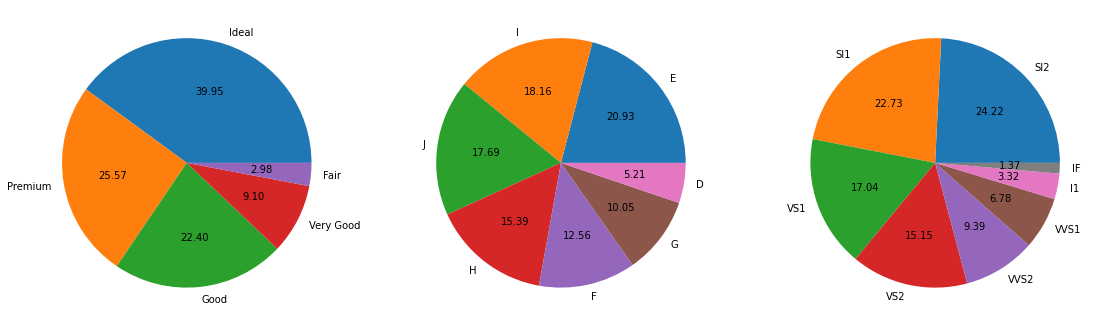

In [7]:
# Lets visualize the data: first categorical variables
fig, ax = plt.subplots(1, len(cat_vars_names), figsize=(19, 8))

for idx, var in enumerate(cat_vars_names):
    cat_var = df_data[var]
    ax[idx].pie(cat_var.value_counts(), labels=cat_var.unique(), autopct='%.2f')

plt.show()

## Analysis
### From the pie charts it can be seen that there is not a category on each categorical variable that takes more than 40% of the total data, this means that the data is well distributed among all categories, and all categories would add information to a regression model.

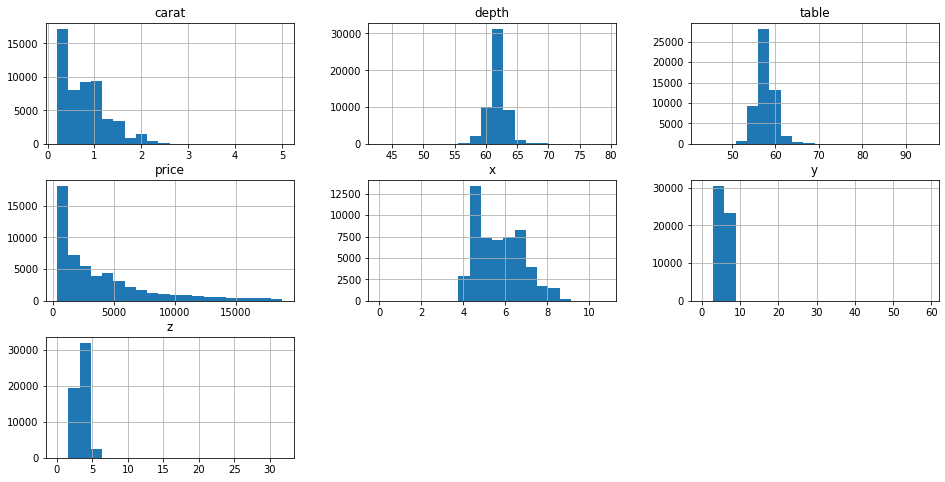

In [8]:
# Let's visualize the data: numerical variables
num_vars = [var for var in df_data.columns if var not in cat_vars_names]

ax = df_data.hist(column=num_vars, figsize=(16, 8), bins=20, layout=(3, 3))
plt.show() # Example with beautiful formatting: https://mode.com/example-gallery/python_histogram/

## Analysis
### It can be seen that both carat and price have a left skewed distribution. Again, is there any relation between these two variables? One would think there is, the higher the carat the more expensive the diamont, but this will be explored later. It can be seen that both depth and table are nomally distributed, and for the other variables (dimensions of diamond) it is suspected that we have a few outliers.

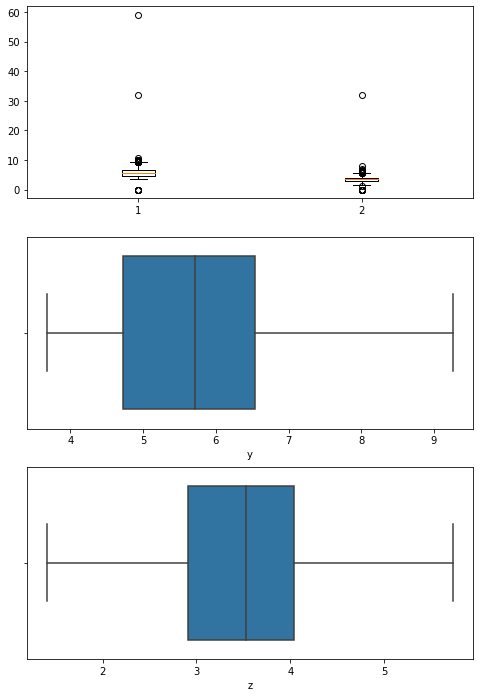

In [9]:
# Let's explore with the help of a box plot y and z
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].boxplot(df_data[["y", "z"]])

# There are three outliers that don't allow the boxplot to be seen

# With Seaborn's boxplot it is easy to ignore outliers on the plot
sns.boxplot(data=df_data, x="y", showfliers=False, ax=ax[1])
sns.boxplot(data=df_data, x="z", showfliers=False, ax=ax[2])
plt.show()

## Analysis
### As it was seen in the distribution plots, both y and z move in a short range. This could be due to the fact that people like their diamonds with a certain geometry, and such geometry doesn't vary much on the y and z axis. What I just said is true, but also we have a few outliers, so let's get rid of them.

(53940, 10)
(51355, 10)


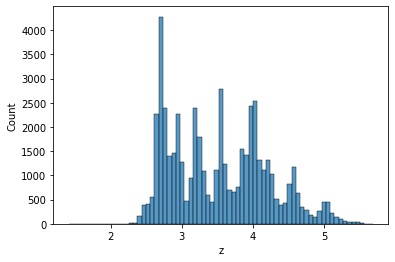

In [10]:
def get_outliers_index(col_df):
    Q1 = col_df.quantile(0.25)
    Q3 = col_df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return ~ ((col_df <= upper_bound) & (col_df >= lower_bound))

def remove_outliers(col_df):
    return col_df[get_outliers_index(col_df)]

# Remove outliers on a copy of the dataframe
df_data_no_fliers = df_data.copy()
print(df_data_no_fliers.shape)
df_data_no_fliers = df_data_no_fliers[~get_outliers_index(df_data_no_fliers["y"])]
df_data_no_fliers = df_data_no_fliers[~get_outliers_index(df_data_no_fliers["z"])]
df_data_no_fliers = df_data_no_fliers[~get_outliers_index(df_data_no_fliers["depth"])]
print(df_data_no_fliers.shape) # Removes around 2000 registers out of 54k

sns.histplot(data=df_data_no_fliers, x="z")
plt.show()

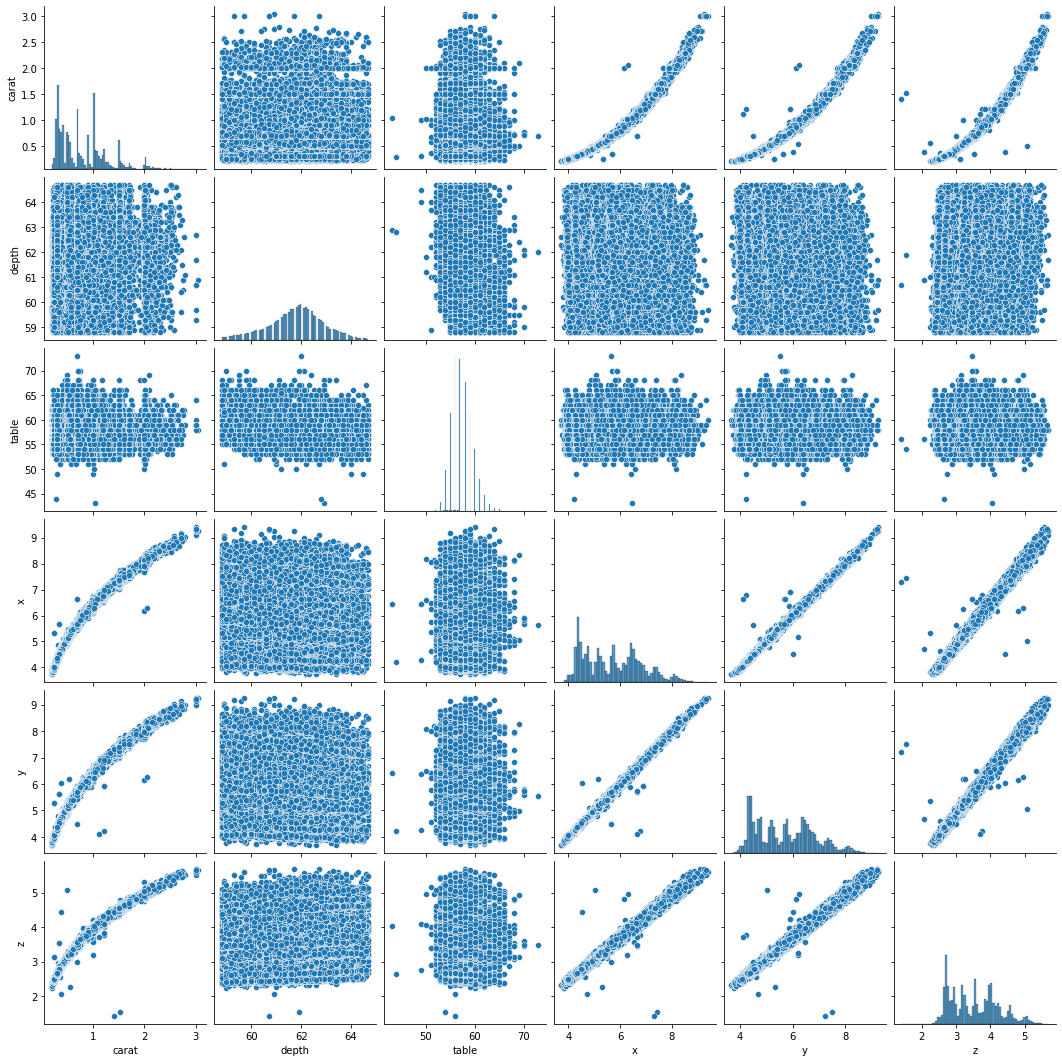

In [11]:
# Let's explore the relation each numerical variable has with each other
num_vars_no_price = [num_var for num_var in num_vars if num_var != "price"]
sns.pairplot(df_data_no_fliers[num_vars_no_price]) # Not exploring the effect of variables over price just yet
plt.show()

## Analysis
### There are clearly strong positive correlations and weak correlations between variables, let's visualize the correlation coefficient.

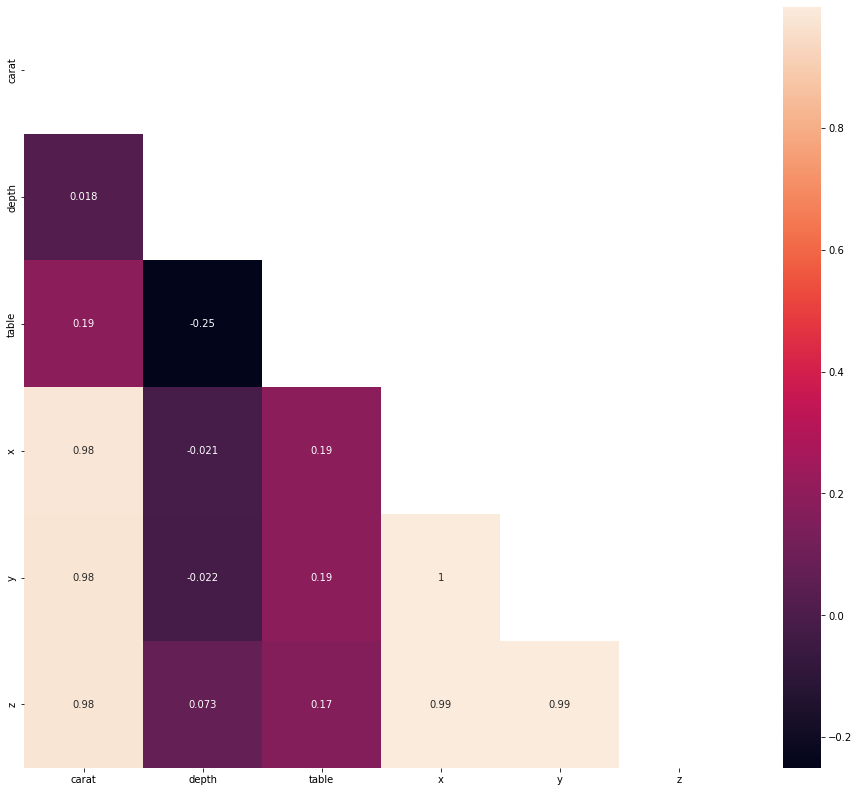

In [12]:
fig, ax = plt.subplots(figsize=(16, 14))

corr_matrix = df_data_no_fliers[num_vars_no_price].corr()
mask = np.triu(np.ones_like(corr_matrix)) # Only visualize upper diagonal
sns.heatmap(corr_matrix, annot=True, mask=mask, ax=ax)
plt.show()

## Analysis
### Carat, x, y and z have strong correlation with each other, this could indicate that not all numerical variables will be needed to predict the price. Also depth and table have weak correlation with the other variables if no correlation is seen between those vars and price, this could mean that they don't add much information to the regression model.

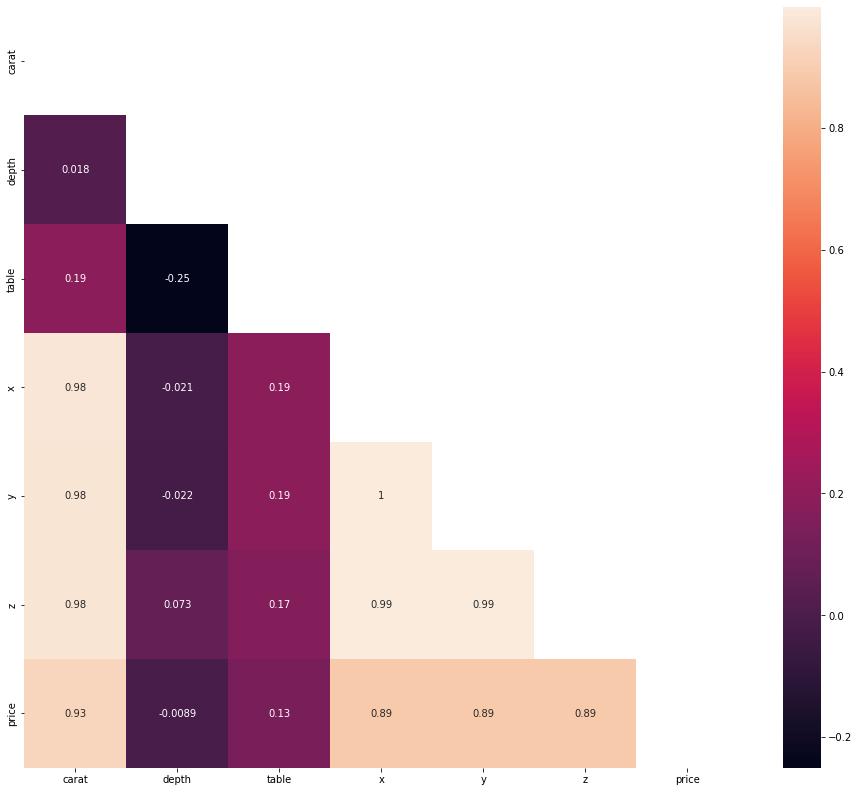

In [13]:
# Now let's see the effect of each numerical var over the price
fig, ax = plt.subplots(figsize=(16, 14))

# For easier visualiztion let's move the price column to the end of the dataframe
def move_col_to_last(df, col):
    """Moves column of pandas data frame to the end, helps with visualization of correlation matrices"""
    df_mod = df.copy().drop(columns=col) # It is good practice to avoid making changes to the original dataframe
    df_mod[col] = df[col]
    return df_mod

df_mod = move_col_to_last(df_data_no_fliers, "price")

corr_matrix = df_mod.corr()
mask = np.triu(np.ones_like(corr_matrix)) # Only visualize upper diagonal
sns.heatmap(corr_matrix, annot=True, mask=mask, ax=ax)
plt.show()

## Analysis
### Carat, x, y and z have strong positive correlation with price. Also depth and table have respectively no correlation and very weak correlation with price, so this follows idea of the last Analysis, they don't add much information to the regression model.

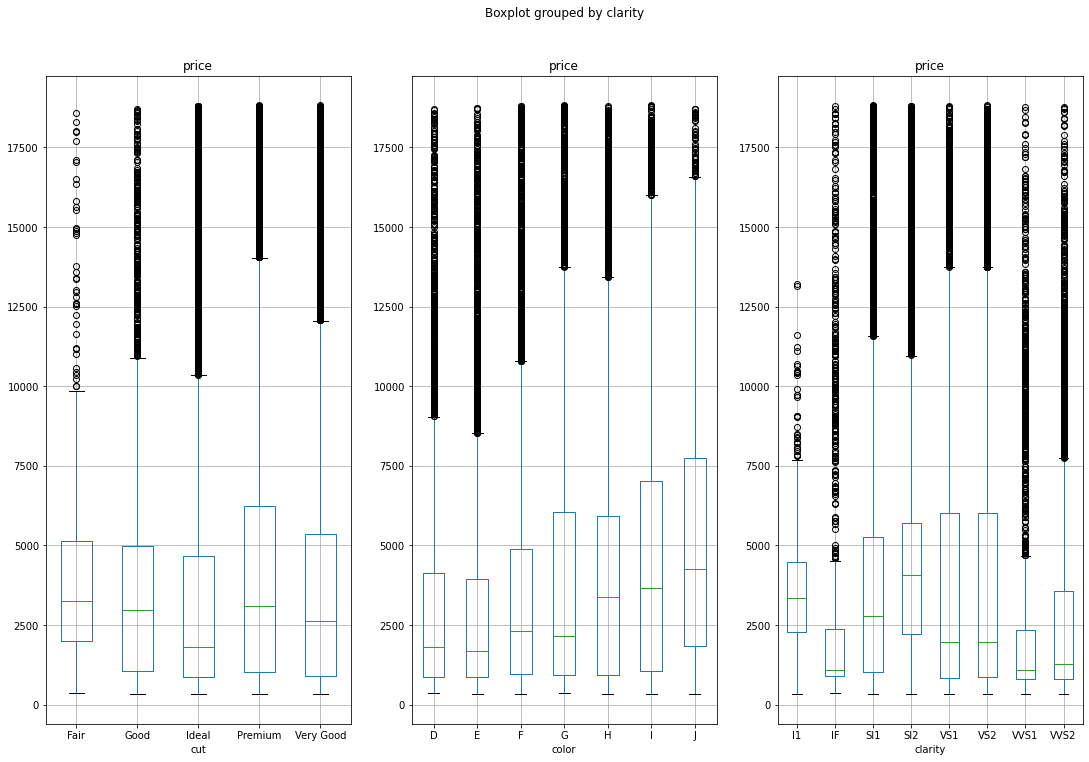

In [14]:
# Now let's see the effect of each category of the categorical vars over the price
fig, ax = plt.subplots(1, 3, figsize=(18, 12))

for i, cat_var in enumerate(cat_vars_names):
    df_mod.boxplot(column="price", by=cat_var, ax=ax[i])
    
plt.show()

## Analysis
### From the plots, there is no clear correlation between the categorical variables and the price, though, for color the mean price gets higher as it goes from D to J, but there are so many outliers that this relationship isn't representative.

In [15]:
def onehot_encode(df, labels):
    for label in labels:
        # Get the variable to encode
        cat_col = df[[label]]

        # Instantiate the encoder
        ohe = OneHotEncoder()
        
        # Fit and train the encoder
        ohe.fit(cat_col)
        encoded_col = pd.DataFrame(ohe.transform(cat_col).toarray(), columns=ohe.get_feature_names_out([cat_col.columns[0]]))
        
        # Concat new columns to original dataframe
        df = pd.concat([df, encoded_col], axis=1)

    return df

# Let's encode the categorical variables to visualize correlation factors of all variables to price and prepare for modeling
df_mod.reset_index(drop=True, inplace=True) # Removed outliers made the indices to have discountinuities, this fixes that.
df_mod_ = onehot_encode(df_mod, cat_vars_names)